This is how much space the figure will take up on letter paper


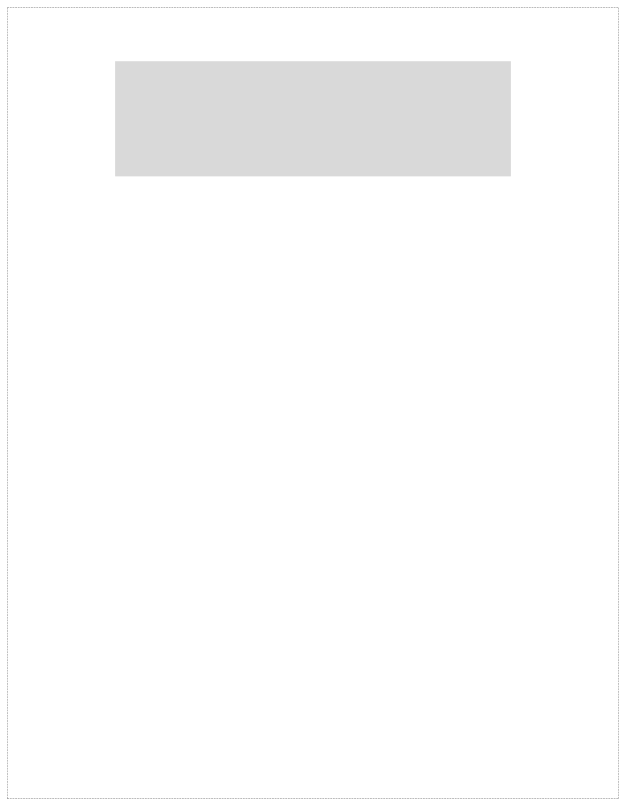

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

Square asymetric noise

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle

from symfac.experimental import RBFExpansionV2

In [5]:
target = torch.normal(0.0, 1.0, (n, n))

100%|██████████| 80000/80000 [02:32<00:00, 523.64it/s]
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], 

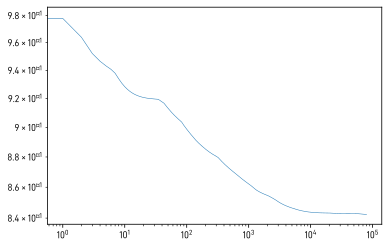

0.842399


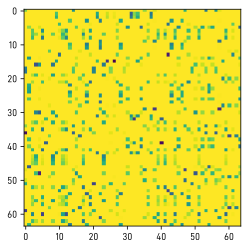

100%|██████████| 80000/80000 [02:02<00:00, 654.68it/s]
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


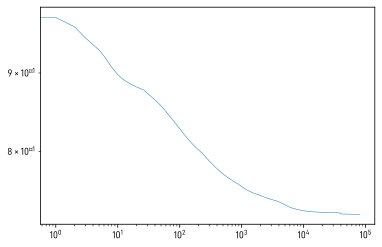

0.7276311


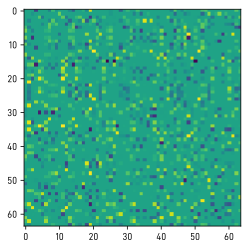

100%|██████████| 80000/80000 [02:09<00:00, 616.92it/s]
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], 

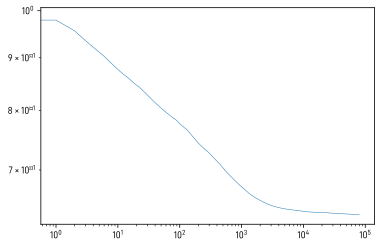

0.6336264


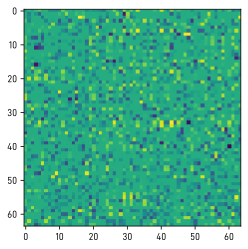

100%|██████████| 80000/80000 [02:16<00:00, 587.79it/s]
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], 

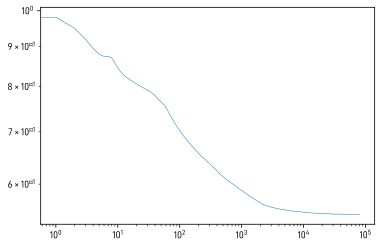

0.5488716


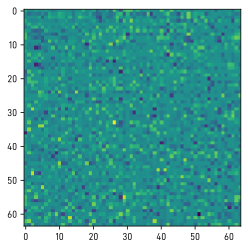

[0.842399, 0.7276311, 0.6336264, 0.5488716]


In [15]:
n = 64
batch_size = 100
errors1 = []


for k in range(1,5):
    u0=1/1000*torch.randn([batch_size, len(target), k], device="cuda") 
    v0=1/1000*torch.randn([batch_size, len(target), k], device="cuda") 

    a=torch.randn([batch_size, k], device="cuda")
    b=torch.randn([batch_size], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=80000, algorithm='Adagrad')
    fac.fit(
        target,
        u0=u0,
        v0=v0,
        a0=a,
        b0=b
    )
    plt.loglog(
    fac.report.loss_history_ticks,
    fac.report.loss_history.min(axis=1)
    )
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors1.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    open('gaus_noise_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors1)

In [14]:
errors

[0.4635457,
 0.3956147,
 0.3439345,
 0.2961201,
 0.2533998,
 0.2065423,
 0.1737343,
 0.1500785,
 0.1139498,
 0.0979054,
 0.0776279,
 0.064418,
 0.0505551,
 0.0404538,
 0.0287647,
 0.0230259]

In [7]:
errors

[0.8424264,
 0.7370978,
 0.6211596,
 0.5502242,
 0.4760725,
 0.4041037,
 0.3549941,
 0.3086503,
 0.2545784,
 0.221799,
 0.1825781,
 0.1478034,
 0.1285513]

In [ ]:
0.8862475,
0.7669685,
0.6658673,
0.5782094,
0.4886611,
0.423012,
0.3722493,
0.3128842,
0.2674971,

In [7]:
s_vals = []
U0, S0, V0 = np.linalg.svd(target.detach().numpy())
for s in range(1, target.shape[0]+1):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U0[:, :s] * S0[None, :s]) @ V0[:s, :]), target)),7))

In [8]:
s_vals

[0.9419381,
 0.8859344,
 0.8338748,
 0.7864932,
 0.7406089,
 0.6979499,
 0.659099,
 0.6211723,
 0.5844578,
 0.55076,
 0.5181491,
 0.4868715,
 0.4586237,
 0.4309303,
 0.4039496,
 0.3776128,
 0.3533512,
 0.330026,
 0.3084247,
 0.2876189,
 0.2672495,
 0.2476121,
 0.2287604,
 0.2118642,
 0.196,
 0.1805781,
 0.1658921,
 0.1525258,
 0.139913,
 0.1276961,
 0.1162281,
 0.1054009,
 0.095642,
 0.086845,
 0.0787343,
 0.0706709,
 0.0634952,
 0.0569403,
 0.0507993,
 0.0450045,
 0.0392346,
 0.0343562,
 0.029748,
 0.0256254,
 0.0220613,
 0.0186359,
 0.0156476,
 0.0127932,
 0.0102799,
 0.0083111,
 0.006655,
 0.0052896,
 0.0041216,
 0.0031587,
 0.0023187,
 0.0016555,
 0.0010624,
 0.0006276,
 0.0003136,
 0.0001735,
 8.66e-05,
 2.59e-05,
 6.6e-06,
 0.0]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

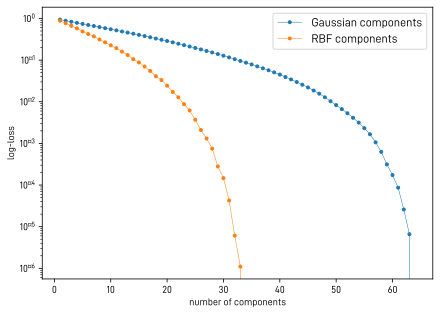

In [16]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(s_vals)+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [14]:
open('gn_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

906

In [15]:
errs, s_vals = pickle.load(open("gn_losses.pickle", "rb"))